***
***

## The Geometry of Culture

Analyzing Meaning through Word Embeddings

***
***

Code and data associated with the ASR paper on the Geometry of Culture. The full paper can be found here: https://journals.sagepub.com/doi/full/10.1177/0003122419877135

Austin C. Kozlowski; Matt Taddy; James A. Evans

Word embeddings represent **semantic relations** between words as **geometric relationships** between vectors in a high-dimensional space, operationalizing a relational model of meaning consistent with contemporary theories of identity and culture. 

## Download this repo
https://github.com/KnowledgeLab/GeometryofCulture


- Dimensions induced by word differences (e.g. man - woman, rich - poor, black - white, liberal - conservative) in these vector spaces closely correspond to dimensions of cultural meaning, 
- Macro-cultural investigation with a longitudinal analysis of the coevolution of gender and class associations in the United States over the 20th century 

The success of these high-dimensional models motivates a move towards "high-dimensional theorizing" of meanings, identities and cultural processes.

$$
\text{similarity} = \cos(\theta) = {\mathbf{A} \cdot \mathbf{B} \over \|\mathbf{A}\| \|\mathbf{B}\|} = \frac{ \sum\limits_{i=1}^{n}{A_i  B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{A_i^2}}  \sqrt{\sum\limits_{i=1}^{n}{B_i^2}} },
$$

where $A_i$ and $B_i$ are components of vector $A$ and $B$ respectively.

In [19]:
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

cos_sim([1, 0, -1], [-1,-1, 0])

-0.4999999999999999

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([[1, 0, -1]], [[-1,-1, 0]])

array([[-0.5]])

### Google News Word2Vec

You can download Google’s pre-trained model here.

- It’s 1.5GB! 
- It includes word vectors for a vocabulary of 3 million words and phrases 
- It is trained on roughly 100 billion words from a Google News dataset. 
- The vector length is 300 features.

### Download GoogleNews-vectors-negative300.bin

- intro: http://mccormickml.com/2016/04/12/googles-pretrained-word2vec-model-in-python/
- intro: https://code.google.com/archive/p/word2vec/
- download: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing

Using the **Gensim** library in python, we can 
- find the most similar words to the resulting vector. 
- add and subtract word vectors, 


In [1]:
import gensim
# Load Google's pre-trained Word2Vec model.
filepath = '/Users/datalab/bigdata/GoogleNews-vectors-negative300.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(filepath, binary=True) 

In [3]:
model['woman'][:10]

array([ 0.24316406, -0.07714844, -0.10302734, -0.10742188,  0.11816406,
       -0.10742188, -0.11425781,  0.02563477,  0.11181641,  0.04858398],
      dtype=float32)

In [7]:
model.most_similar('Socrates')

[('Plato_Apology', 0.5661361217498779),
 ('philosopher_Socrates', 0.561074435710907),
 ('Aristotle', 0.5599992275238037),
 ('Parmenides', 0.541626513004303),
 ('Sophists', 0.5381807088851929),
 ('Sócrates', 0.533310055732727),
 ('Plato', 0.5317621827125549),
 ('philosopher_Aristotle', 0.5256754159927368),
 ('Plato_Socrates', 0.524064838886261),
 ('philosopher_Plato', 0.5164784789085388)]

In [10]:
model.similarity('woman', 'man')

0.76640123

In [24]:
cos_sim(model['woman'], model['man'])

0.76640123

In [25]:
model.most_similar(positive=['woman', 'king'], negative=['man'], topn=5)

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431607246399),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133)]

In [52]:
from numpy import dot  #Dot product#
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial


def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

def cos(x, y):
    return 1 - spatial.distance.cosine(x, y)

def nrm(x):
    # Normalize vector#
    return x/norm(x)

def dimension(x, y):
    # Calculate semantic dimension from antonym pair#
    return nrm(nrm(x)-nrm(y))


In [53]:
###IMPORT LISTS OF TERMS TO PROJECT AND ANTONYM PAIRS#####
import pandas as pd
ant_pairs_aff = pd.read_csv("../data/word_pairs/affluence_pairs.csv",header=None)
ant_pairs_gen = pd.read_csv()  # change here
ant_pairs_race = pd.read_csv() # change here

In [68]:
def make_dim(model, df):
    word_dims = []
    for i in df.index:
        rp_word1 = df[0][i]
        rp_word2 = df[1][i]
        try:
            # 计算rp_word1、rp_word2两个词向量构成的dimension
            word_dims.append( ) # change here
        except:
            pass
    dim_ave = pd.DataFrame(word_dims).mean().tolist()
    dim_ave_= nrm(dim_ave)
    return dim_ave
    

In [73]:
aff_dim = make_dim(model, ant_pairs_aff)
gender_dim = make_dim( ) # change here
race_dim = make_dim( ) # change here


In [75]:
# 计算aff_dim、gender_dim、race_dim三者的cosine similarity


(-0.014282578052009498, -0.10834102639266807, -0.06033891833467253)

In [83]:
wlist=["camping","baseball","boxing","volleyball","softball","golf","tennis","soccer","basketball","hockey"]

aff_proj = [cos(aff_dim, model[i]) for i in wlist]
gender_proj = [] # change here
race_proj = [ ]# change here

In [85]:
dimension(model['man'], model['woman'])[:5]

array([ 0.07256063,  0.12535858,  0.07870991,  0.0066219 , -0.00821159],
      dtype=float32)

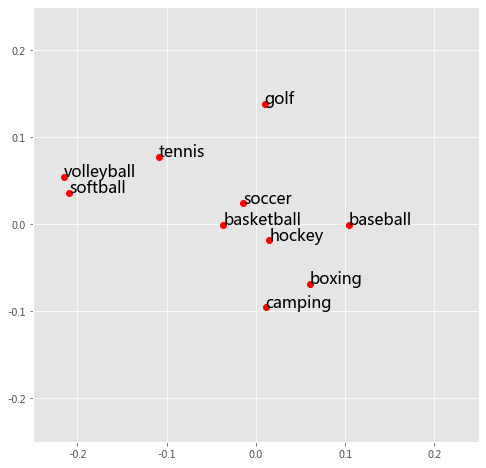

In [95]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

# 绘图

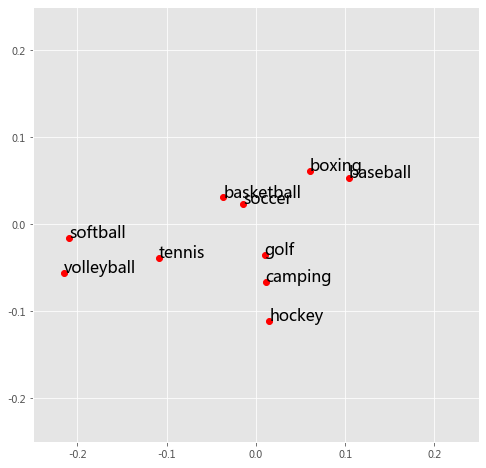

In [96]:
# 绘图


Now that we’ve looked at trained word embeddings, 

- let’s learn more about the training process. 
- But before we get to word2vec, we need to look at a conceptual parent of word embeddings: **the neural language model**.



# Gensim Word2vec 

In [16]:
import gensim as gensim
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from gensim.models.word2vec import LineSentence

In [47]:
# 下载理想国英文版本txt文件，网址为：http://www.gutenberg.org/cache/epub/150/pg150.txt

with open("pg150.txt", 'r') as f:
    lines = f.readlines()


In [48]:
len(lines)

16960

In [52]:
book = []
paragraph = ''
for i in lines:
    if i !='\n':
        paragraph = paragraph + ' '+ i
    else:
        book.append(paragraph)
        paragraph = ''
    

In [53]:
len(book)

4519

In [54]:
book = [i.replace('\n', '').split(' ') for i in book]

book[0]

['',
 '\ufeffThe',
 'Project',
 'Gutenberg',
 'EBook',
 'of',
 "Plato's",
 'Republic,',
 'by',
 'Plato']

In [55]:
# 调用gensim Word2Vec的算法进行训练。
# 参数分别为：size: 100 嵌入后的词向量维度；window: 2上下文的宽度，min_count 0 为考虑计算的单词的最低词频阈值
model = Word2Vec( ) # change here

In [56]:
model['Socrates']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-1.37807399e-01, -8.50972980e-02, -1.13084763e-02, -5.47388643e-02,
       -7.65230134e-03,  4.63625900e-02, -1.47486730e-02,  5.45147732e-02,
       -4.95448150e-02,  3.51702049e-02, -2.01568142e-01, -2.71834917e-02,
        2.41141934e-02, -2.37497687e-03,  5.85087836e-02, -2.91526467e-02,
       -3.89404669e-02, -3.37465070e-02,  3.65749188e-02, -3.33004259e-02,
        3.11295446e-02, -4.64655086e-02, -2.74411552e-02, -1.17913283e-01,
       -9.69972741e-03, -2.03968666e-04,  3.42998542e-02, -4.59230319e-02,
       -2.28419363e-01,  7.53095001e-02,  1.16067998e-01,  2.36383397e-02,
        1.27256542e-01, -7.05621243e-02,  1.00037888e-01,  4.58286814e-02,
       -5.83368801e-02, -8.03394169e-02, -1.82675138e-01, -6.63211495e-02,
        8.43277853e-03, -6.84499145e-02,  1.28329352e-01, -1.21511919e-02,
        3.29800136e-02,  4.06918265e-02,  6.52354583e-02,  1.52770486e-02,
       -1.01396181e-01,  1.15474589e-01, -7.89184794e-02,  3.35669294e-02,
        6.52226880e-02, -

In [57]:
model.wv.most_similar('Socrates', topn = 10)

[('words', 0.9993601441383362),
 ('her', 0.9993101954460144),
 ('always', 0.9993042945861816),
 ('tyrant', 0.9992969036102295),
 ('real', 0.999282717704773),
 ('injustice', 0.9992785453796387),
 ('himself', 0.9992719888687134),
 ('public', 0.9992649555206299),
 ('after', 0.999255895614624),
 ('reason', 0.9992557764053345)]

In [67]:
model.wv.most_similar('justice', topn = 10)

[('best', 0.9997957944869995),
 ('some', 0.9997676610946655),
 ('use', 0.9997552633285522),
 ('opinion', 0.9997509121894836),
 ('another', 0.9997390508651733),
 ('either', 0.9997327327728271),
 ('our', 0.9997314214706421),
 ('evil', 0.9997271299362183),
 ('pleasure', 0.999714195728302),
 ('thing', 0.9997127652168274)]

In [72]:
model.wv.most_similar('man', topn = 10)

[('good', 0.9996432065963745),
 ('city', 0.9995303153991699),
 ('him', 0.999497652053833),
 ('another', 0.9994549751281738),
 ('life', 0.9994546175003052),
 ('State,', 0.9994027018547058),
 ('way', 0.9993818998336792),
 ('evil', 0.9993690848350525),
 ('time', 0.999363899230957),
 ('class', 0.9993453025817871)]

In [60]:
# 将词向量投影到二维空间
import numpy as np
from sklearn.decomposition import PCA

rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.vocab):
    rawWordVec.append(model[w])
    word2ind[w] = i
rawWordVec = np.array(rawWordVec)
X_reduced = PCA( ).fit_transform(rawWordVec) # change here

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


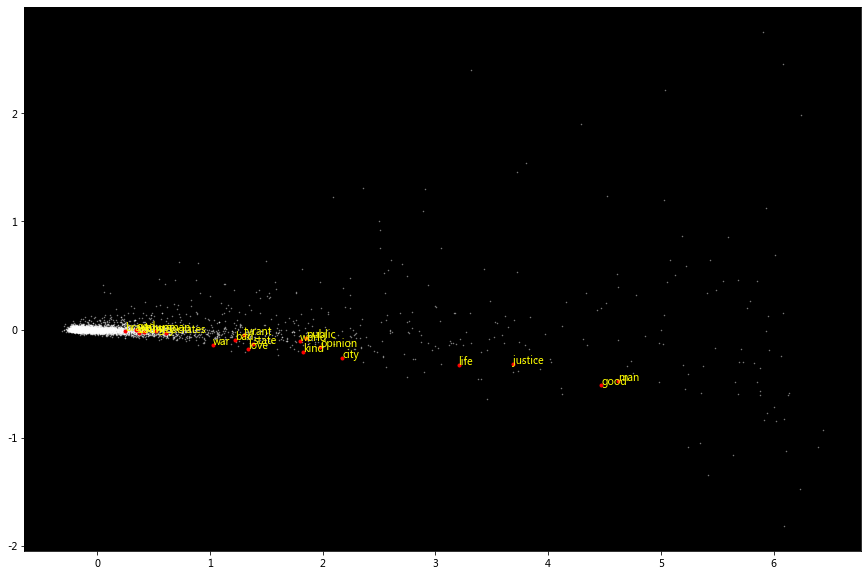

In [78]:
# 绘制星空图
# 绘制所有单词向量的二维空间投影
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('black')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.5, color = 'white')
# 绘制几个特殊单词的向量
words = [] # change here
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'red')
        plt.text(xy[0], xy[1], w,  alpha = 1, color = 'yellow')

# END